# Pause Analysis
- read SG tables
- various pause values
- correlation
- linear regression


In [1]:
pip install tprdbreader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 50.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# import libraries
import os.path
import sys

import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from tprdbreader import readTPRDBtable_GCP

## Pause Analysis
Some measures according to Isabel Lacruz and Gregory M. Shreve, (2015)

- pause ratio (PR) 

    $\mbox{PR} =\frac{\mbox{total pause time in segment}}{\mbox{total time in segment}}$
    

- event to word ratio (EWR) 

    $\mbox{EWR} =\frac{\mbox{number of complete editing events}}{\mbox{number of words}}$
    

- average pause ratio (APR)

    $ \mbox{APR} =\frac{\mbox{average time per pause}}{\mbox{average time per words}}$
    

- pause to word ratio (PWR) 

    $ \mbox{PWR} =\frac{\mbox{number of pauses in segment}}{\mbox{number of words in segment}}$


In [5]:
# read sessions from many different studies:
studies = ["BML12","SG12","RUC17","ENJA15","KTHJ08","NJ12","AR20"]
ext = "sg"
sessions = readTPRDBtable_GCP(studies, ext, user = "TPRDB", verbose=1)

#sessions = TPRDB.readTPRDBtables(["BML12/Tables/", "SG12/Tables/","RUC17/Tables/","ENJA15/Tables/","KTHJ08/Tables/", "NJ12/Tables/", "AR20/Tables/"], "*sg", path="/data/critt/tprdb/TPRDB/", verbose = 1)


BML12	#sessions: 184	.sg:1264
SG12	#sessions: 139	.sg:1009
RUC17	#sessions: 124	.sg:848
ENJA15	#sessions: 229	.sg:1640
KTHJ08	#sessions: 69	.sg:548
NJ12	#sessions: 100	.sg:682
AR20	#sessions: 124	.sg:850



From English to:
- Spanish:  BML12	#sessions:184	
- German:   SG12	#sessions:139	
- Chinese:  RUC17	#sessions:124	
- Japanese: ENJA15	#sessions:229	
- Danish:   KTHJ08	#sessions:69	
- Hindi:    NJ12	#sessions:99	
- Arabic:   AR20	#sessions:123



In [4]:
pd.set_option('display.max_columns', 500)
print(sessions.shape)
sessions.head()

(6829, 56)


,Id,Study,Session,SL,TL,Task,Text,Part,STseg,TTseg,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN
0,1,BML12,P01_E5,en,es,E,5,P01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,3,167,25,3864,0,0,0,0,0,0,8,50,9,62,0,---,La_sociología_es_una_disciplina_académica_rela...,1.12,1.00,2.00,0.12,0.14,0.19,0.23,3.65,0.46
1,2,BML12,P01_E5,en,es,E,5,P01,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,42,5777,0,0,0,0,0,0,16,81,14,68,0,---,Surgió_en_el_siglo_19_en_respuesta_a_los_desaf...,1.06,1.50,1.06,0.59,0.95,0.60,1.12,5.80,0.65
2,3,BML12,P01_E5,en,es,E,5,P01,3,3,1,128531,128531,114139,11641,2751,4,11328,3064,3,11328,3064,3,11328,3064,3,0,14392,0,-0.39,0,0,214,27764,0,0,0,0,26,13,21,145,30,164,0,---,El_incremento_de_la_movilidad_y_de_los_avances...,1.43,1.00,2.24,0.29,1.24,1.18,1.82,6.52,0.71
3,4,BML12,P01_E5,en,es,E,5,P01,4,4,1,55516,55516,6922,45660,2934,14,44956,3638,12,42986,5608,9,37673,10921,5,28516,20078,2,2.32,0,0,194,17339,0,0,0,0,13,32,31,178,30,189,0,---,"El_impacto_de_esta_exposición_fue_variada_,_pe...",1.03,1.19,1.42,0.56,1.08,0.63,1.32,6.47,0.66
4,5,BML12,P01_E5,en,es,E,5,P01,5,5,1,56578,56578,3047,51092,2439,11,50249,3282,9,47390,6141,5,44280,9251,3,37110,16421,1,0.85,0,0,98,7627,0,0,0,0,24,17,26,175,34,194,0,---,Los_sociólogos_han_respondido_a_estos_cambios_...,1.35,1.15,1.92,0.51,1.15,1.23,1.82,6.57,0.69


In [5]:
# Pause Ratio: PRx: 
#  a) total pauses: PreGap + TypingGap_x /Dur
#  b) total pauses: TypingGap_x / Dur - PreGap
#  total time in segment: Dur

sessions["PR300a"] = (sessions["PreGap"] + sessions["TG300"]) / (sessions["Dur"] +1)
sessions["PR500a"] = (sessions["PreGap"] + sessions["TG500"]) / (sessions["Dur"] +1)
sessions["PR1000a"] = (sessions["PreGap"] + sessions["TG1000"]) / (sessions["Dur"] +1)

sessions["PR300b"] = (sessions["TG300"]) / (sessions["Dur"] - sessions["PreGap"] + 1)
sessions["PR500b"] = (sessions["TG500"]) / (sessions["Dur"] - sessions["PreGap"] + 1)
sessions["PR1000b"] = (sessions["TG1000"]) / (sessions["Dur"] - sessions["PreGap"] + 1)


# PWR: 
#  a) TBx +1 / TokS
#  b) TBx +1 / TokT

sessions["PWR300S"] = (sessions["TB300"]) / (sessions["TokS"])
sessions["PWR500S"] = (sessions["TB500"]) / (sessions["TokS"])
sessions["PWR1000S"] = (sessions["TB1000"]) / (sessions["TokS"])
sessions["PWR2000S"] = (sessions["TB2000"]) / (sessions["TokS"])
sessions["PWR5000S"] = (sessions["TB5000"]) / (sessions["TokS"])

sessions["PWR300T"] = (sessions["TB300"]) / (sessions["TokT"])
sessions["PWR500T"] = (sessions["TB500"]) / (sessions["TokT"])
sessions["PWR1000T"] = (sessions["TB1000"]) / (sessions["TokT"])
sessions["PWR2000T"] = (sessions["TB2000"]) / (sessions["TokT"])
sessions["PWR5000T"] = (sessions["TB5000"]) / (sessions["TokT"])

# APR: average time per pause / average time per word
#  average time per pause: (PreGap +) TypingGap / TypingBursts +1 
#     == sessionssg["TGx"] /   sessionssg["TBx"]
#  average time per word: TypingDuration / number of words
#      == sessionssg["TDx"] /   sessionssg["TokT"]

sessions["APR300"] = (sessions["TG300"] * sessions["TokT"]) / (sessions["TB300"] * sessions["TD300"] +1)
sessions["APR500"] = (sessions["TG500"] * sessions["TokT"]) / (sessions["TB500"] * sessions["TD500"] +1)
sessions["APR1000"] = (sessions["TG1000"] * sessions["TokT"]) / (sessions["TB1000"] * sessions["TD1000"] +1)
sessions["APR2000"] = (sessions["TG2000"] * sessions["TokT"]) / (sessions["TB2000"] * sessions["TD2000"] +1)
sessions["APR5000"] = (sessions["TG5000"] * sessions["TokT"]) / (sessions["TB1000"] * sessions["TD5000"] +1)


print(sessions.shape)
sessions.head()

(6829, 77)


,Id,Study,Session,SL,TL,Task,Text,Part,STseg,TTseg,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN,PR300a,PR500a,PR1000a,PR300b,PR500b,PR1000b,PWR300S,PWR500S,PWR1000S,PWR2000S,PWR5000S,PWR300T,PWR500T,PWR1000T,PWR2000T,PWR5000T,APR300,APR500,APR1000,APR2000,APR5000
0,1,BML12,P01_E5,en,es,E,5,P01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,3,167,25,3864,0,0,0,0,0,0,8,50,9,62,0,---,La_sociología_es_una_disciplina_académica_rela...,1.12,1.00,2.00,0.12,0.14,0.19,0.23,3.65,0.46,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,BML12,P01_E5,en,es,E,5,P01,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,42,5777,0,0,0,0,0,0,16,81,14,68,0,---,Surgió_en_el_siglo_19_en_respuesta_a_los_desaf...,1.06,1.50,1.06,0.59,0.95,0.60,1.12,5.80,0.65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,BML12,P01_E5,en,es,E,5,P01,3,3,1,128531,128531,114139,11641,2751,4,11328,3064,3,11328,3064,3,11328,3064,3,0,14392,0,-0.39,0,0,214,27764,0,0,0,0,26,13,21,145,30,164,0,---,El_incremento_de_la_movilidad_y_de_los_avances...,1.43,1.00,2.24,0.29,1.24,1.18,1.82,6.52,0.71,0.978589,0.976154,0.976154,0.808796,0.787049,0.787049,0.190476,0.142857,0.142857,0.142857,0.000000,0.133333,0.100000,0.100000,0.100000,0.000000,31.733757,36.967258,36.967258,36.967258,0.000000
3,4,BML12,P01_E5,en,es,E,5,P01,4,4,1,55516,55516,6922,45660,2934,14,44956,3638,12,42986,5608,9,37673,10921,5,28516,20078,2,2.32,0,0,194,17339,0,0,0,0,13,32,31,178,30,189,0,---,"El_impacto_de_esta_exposición_fue_variada_,_pe...",1.03,1.19,1.42,0.56,1.08,0.63,1.32,6.47,0.66,0.947133,0.934453,0.898968,0.939603,0.925116,0.884577,0.451613,0.387097,0.290323,0.161290,0.064516,0.466667,0.400000,0.300000,0.166667,0.066667,33.347129,30.892640,25.549898,20.697176,4.734177
4,5,BML12,P01_E5,en,es,E,5,P01,5,5,1,56578,56578,3047,51092,2439,11,50249,3282,9,47390,6141,5,44280,9251,3,37110,16421,1,0.85,0,0,98,7627,0,0,0,0,24,17,26,175,34,194,0,---,Los_sociólogos_han_respondido_a_estos_cambios_...,1.35,1.15,1.92,0.51,1.15,1.23,1.82,6.57,0.69,0.956874,0.941975,0.891444,0.954420,0.938672,0.885265,0.423077,0.346154,0.192308,0.115385,0.038462,0.323529,0.264706,0.147059,0.088235,0.029412,64.745732,57.837638,52.473784,54.245154,15.367208


In [6]:
# statistics for columns
pd.set_option("display.precision", 2)
sessions.describe()

,Id,Text,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,Ins,Del,TokS,LenS,TokT,LenT,LenMT,TGnbrMean,SGnbrMean,CrossSMean,ISseg,ITseg,ICseg,ISTCseg,HTot,HTotN,PR300a,PR500a,PR1000a,PR300b,PR500b,PR1000b,PWR300S,PWR500S,PWR1000S,PWR2000S,PWR5000S,PWR300T,PWR500T,PWR1000T,PWR2000T,PWR5000T,APR300,APR500,APR1000,APR2000,APR5000
count,6829.00,6829.00,6829.00,6.83e+03,6.83e+03,6.83e+03,6.83e+03,6829.00,6829.00,6.83e+03,6829.00,6829.00,6.83e+03,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.0,6829.00,6.83e+03,6829.0,6829.0,6829.0,6829.0,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.0,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6829.00,6670.00,6670.00,6670.00,6670.00,6670.00,6665.00,6665.00,6665.00,6665.00,6665.00,6.83e+03,6.83e+03,6.83e+03,6.83e+03,6.83e+03
mean,4.34,3.11,2.06,1.27e+05,1.04e+05,4.56e+04,7.41e+04,6883.59,25.28,7.13e+04,9715.60,18.09,6.63e+04,14726.01,11.03,60235.71,20772.33,6.76,48573.01,32435.03,3.04,0.59,103.36,26744.4,164.55,4.00e+04,0.0,0.0,0.0,0.0,72.65,24.24,20.54,115.48,22.43,92.61,0.0,1.64,1.75,2.86,0.95,2.19,1.75,2.75,6.58,0.74,0.83,0.80,0.76,0.78,0.73,0.65,1.22,0.87,0.53,0.32,0.14,1.17,0.83,0.50,0.30,0.13,7.84e+04,5.32e+04,3.59e+04,9.27e+03,1.17e+03
std,2.56,1.83,2.52,1.53e+05,1.06e+05,9.28e+04,1.03e+05,9781.27,33.13,1.00e+05,13085.09,24.58,9.60e+04,20021.27,14.32,90645.46,27336.65,8.37,81896.45,38486.76,3.95,2.46,169.56,38270.4,308.03,5.99e+04,0.0,0.0,0.0,0.0,76.77,42.89,10.14,61.68,12.29,68.41,0.0,0.77,0.87,1.75,0.71,1.10,0.87,1.19,1.48,0.14,0.28,0.29,0.30,0.30,0.31,0.33,1.41,1.05,0.62,0.36,0.17,1.44,1.05,0.60,0.34,0.15,5.80e+05,4.63e+05,3.83e+05,1.44e+05,3.13e+04
min,1.00,1.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-18.00,0.00,0.0,0.00,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
25%,2.00,1.00,1.00,3.43e+04,3.26e+04,4.09e+03,1.22e+04,421.00,6.00,1.07e+04,852.00,4.00,8.45e+03,1827.00,2.00,5625.00,3769.00,1.00,0.00,7940.00,0.00,0.00,10.00,2262.0,18.00,4.79e+03,0.0,0.0,0.0,0.0,19.00,2.00,13.00,66.00,13.00,42.00,0.0,1.16,1.29,1.60,0.43,1.34,1.09,1.89,6.00,0.68,0.83,0.77,0.68,0.71,0.62,0.47,0.38,0.29,0.16,0.08,0.00,0.35,0.26,0.15,0.08,0.00,1.75e+00,1.85e+00,1.93e+00,1.92e+00,0.00e+00
50%,4.00,3.00,1.00,7.82e+04,7.31e+04,1.70e+04,3.91e+04,2560.00,15.00,3.64e+04,4196.00,11.00,3.23e+04,7303.00,7.00,27750.00,11715.00,4.00,18673.00,20985.00,2.00,0.09,48.00,13896.0,73.00,2.37e+04,0.0,0.0,0.0,0.0,48.00,11.00,20.00,108.00,20.00,74.00,0.0,1.42,1.62,2.38,0.80,2.21,1.74,2.89,6.73,0.77,0.96,0.93,0.89,0.92,0.87,0.77,0.90,0.64,0.38,0.23,0.10,0.82,0.59,0.35,0.21,0.09,1.30e+01,1.04e+01,8.29e+00,7.05e+00,1.27e+00
75%,6.00,5.00,2.00,1.60e+05,1.45e+05,4.47e+04,9.48e+04,9546.00,33.00,9.07e+04,13398.00,24.00,8.42e+04,19645.00,15.00,76129.00,27062.00,9.00,59267.00,44084.00,4.00,0.55,128.00,35885.0,187.00,5.25e+04,0.0,0.0,0.0,0.0,101.00,29.00,27.00,159.00,31.00,128.00,0.0,2.00,2.03,3.82,1.29,3.02,2.38,3.64,7.55,0.83,0.99,0.98,0.96,0.98,0.96,0.92,1.58,1.12,0.71,0.46,0.21,1.47,1.03,0.66,0.42,0.19,7.40e+01,4.77e+01,2.99e+01,2.06e+01,4.88e+00
max,13.00,6.00,30.00,1.22e+06,1.19e+06,1.12e+06,1.06e+06,75691.00,580.00,1.05e+06,95677.00,467.00,1.02e+06,307418.00,236.00,893983.00,441294.00,136.00,844764.00,534988.00,45.00,49.60,2452.00,438818.0,5233.00,1.15e+06,0.0,0.0,0.0,0.0,612.00,953.00,74.00,427.00,83.00,409.00,0.0,11.04,15.18,14.53,5.25,5.29,4.69,5.29,9.34,0.92,1.00,1.00,1.00,1.00,1.00,1.00,26.00,21.88,14.50,6.50,2.25,41.60,27.20,14.50,6.50,1.80,1.62e+07,1.40e+07,1.40e+07,6.07e+06,1.28e+06


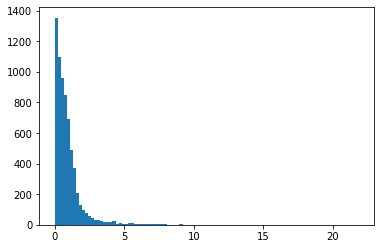

In [9]:
# Histogram PWR
plt.hist(sessions["PWR500S"], bins=100)
plt.show()



          PWR300S  PWR500S  PWR1000S  PWR2000S  PWR5000S
PWR300S      1.00     0.97      0.83      0.67      0.55
PWR500S      0.97     1.00      0.91      0.75      0.62
PWR1000S     0.83     0.91      1.00      0.92      0.75
PWR2000S     0.67     0.75      0.92      1.00      0.86
PWR5000S     0.55     0.62      0.75      0.86      1.00


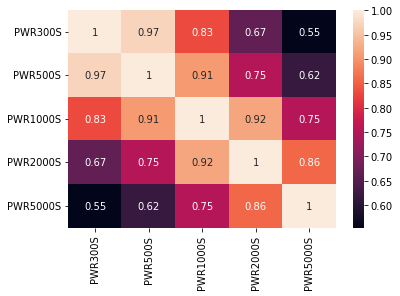

In [10]:
# extract subset from sessions
sessions1 = pd.DataFrame(sessions,columns=['PWR300S','PWR500S','PWR1000S','PWR2000S','PWR5000S'])

# compute and plot correlation matrix\
corrMatrix = sessions1.corr(method="pearson")
print(corrMatrix)

# more fancy visualization of correlation matrix\
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Task:
# test with other pause and effort measures

          PWR300T  PWR500T  PWR1000T  PWR2000T  PWR5000T
PWR300T      1.00     0.97      0.83      0.66      0.54
PWR500T      0.97     1.00      0.90      0.74      0.61
PWR1000T     0.83     0.90      1.00      0.92      0.74
PWR2000T     0.66     0.74      0.92      1.00      0.85
PWR5000T     0.54     0.61      0.74      0.85      1.00


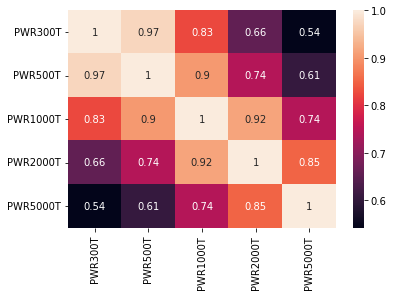

In [11]:
# extract subset from sessions
corrMatrix = sessions[['PWR300T','PWR500T','PWR1000T','PWR2000T','PWR5000T']].corr(method="pearson")

# compute and plot correlation matrix\
print(corrMatrix)

# more fancy visualization of correlation matrix\
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Task:
# test with other pause and effort measures

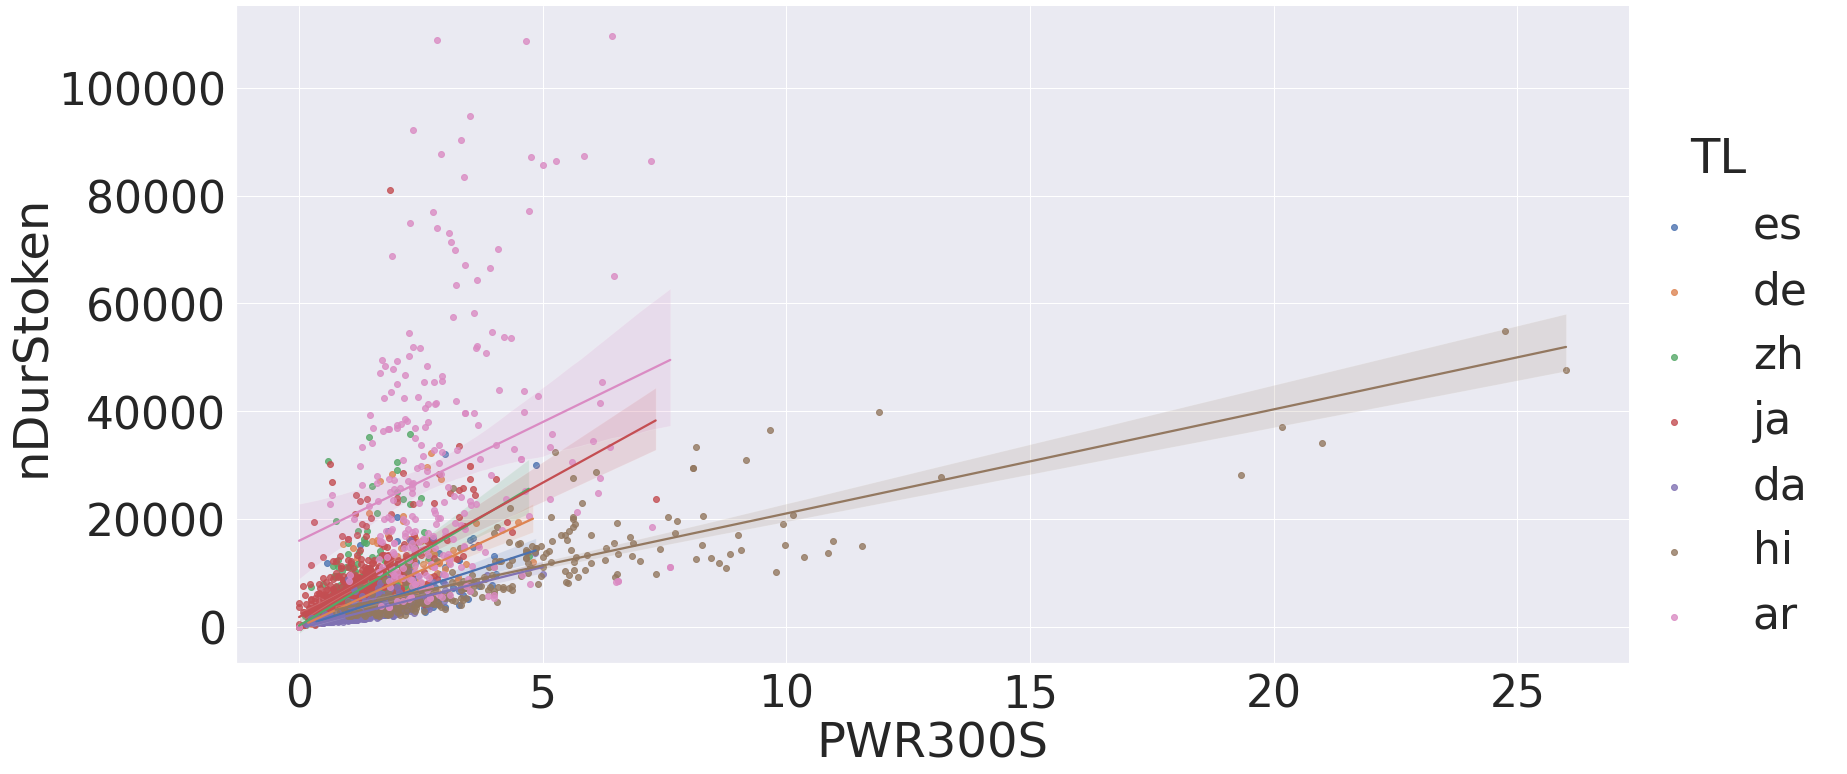

In [24]:
# ordinary least square regression

sessions['nDurStoken'] = sessions['Dur']/sessions['TokS'] 

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
sns.set(font_scale = 4)

sns.lmplot(x='PWR300S', y='nDurStoken', hue='TL', data=sessions[sessions['Task'] == 'T'],  height=12, aspect=2)


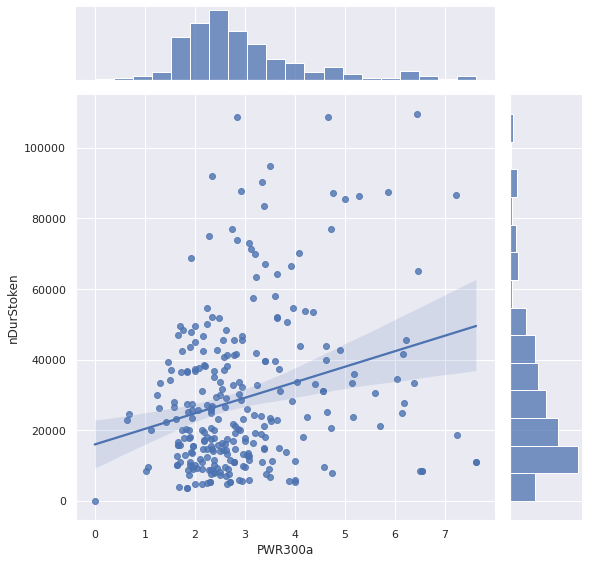

In [101]:
sns.set(font_scale = 1)

g = sns.JointGrid(x='PWR300S', y='nDurStoken', data=sessions[(sessions['Task'] == 'T') & (sessions['TL'] == 'ar')], height=8)
g.plot(sns.regplot, sns.histplot)

| Correlation | Regression|
| :--- | :--- |
| Correlation determines the interconnection or a co-relationship between the variables. | Regression explains how an independent variable is numerically associated with the dependent variable. |
| In Correlation the independent and dependent values have no difference. | In Regression, the dependent and independent variables are different. |
|Correlation stipulates the degree to which both of the variables can move together. |	Regression specifies the effect of the change in the unit, in the known variable($x$) on the evaluated variable ($y$). |
|Correlation helps to constitute the connection between the two variables. | Regression helps in estimating a variable’s value based on another given value.|

                            OLS Regression Results                            
Dep. Variable:                   nDur   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     366.6
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.39e-97
Time:                        20:23:07   Log-Likelihood:                -4440.0
No. Observations:                 486   AIC:                             8886.
Df Residuals:                     483   BIC:                             8899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.5097    211.729      2.269      0.0

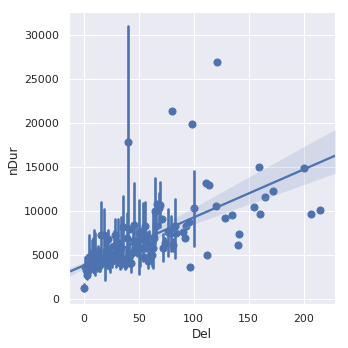

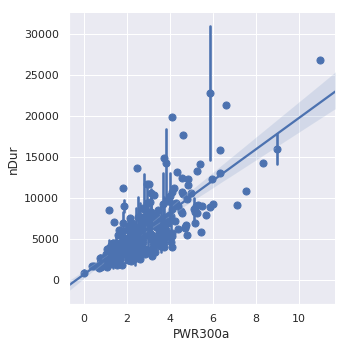

In [29]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### 
lmf = smf.ols(formula="nDur ~ PWR300S + Del" , data=sessions).fit()
print(lmf.summary())

sns.set(color_codes=True)
sns.lmplot(x="Del", y="nDur", x_estimator=np.mean, data=sessions)
sns.lmplot(x="PWR300S", y="nDur", x_estimator=np.mean, data=sessions)
plt.show()



In [10]:
# Compute values for different pause thresholds
# Compute values for different language pairs